# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [8]:
# Your code here :
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)



# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [9]:
from keras.backend import clear_session
clear_session()

In [10]:
# Your code here :
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the baseline model
baseline_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])



*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [12]:
# Your code here :
# Compile the baseline model
from tensorflow.keras.optimizers import SGD

baseline_model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the baseline model
baseline_history = baseline_model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.1346 - loss: 2.2860 - val_accuracy: 0.2139 - val_loss: 2.2094
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2370 - loss: 2.1750 - val_accuracy: 0.2753 - val_loss: 2.0760
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2901 - loss: 2.0452 - val_accuracy: 0.3022 - val_loss: 1.9748
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3198 - loss: 1.9551 - val_accuracy: 0.3313 - val_loss: 1.9031
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3449 - loss: 1.8934 - val_accuracy: 0.3497 - val_loss: 1.8605
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3529 - loss: 1.8545 - val_accuracy: 0.3548 - val_loss: 1.8327
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3647 - loss: 1.8237 - val_accuracy: 0.3427 - val_loss: 1.8315
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3768 - loss: 1.7934 - val_accuracy: 0.3808 - val_los

*   Plot the cross entropy loss curve and the accuracy curve

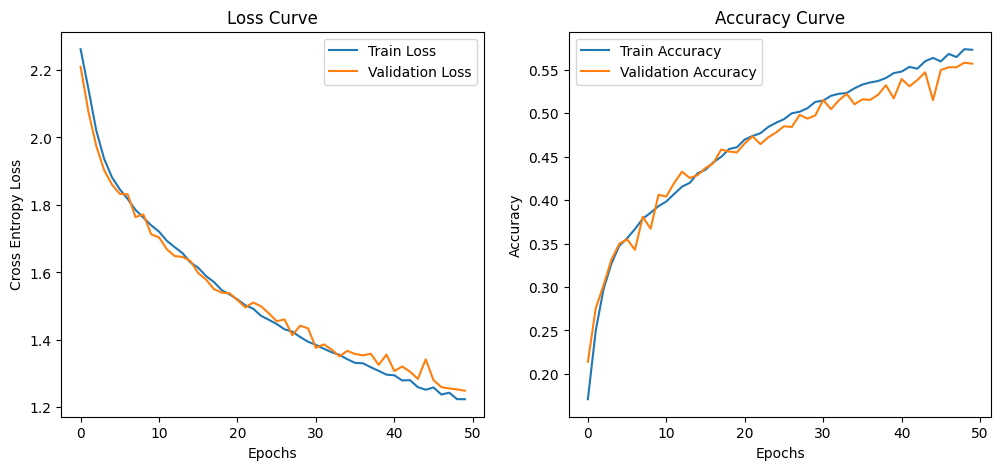

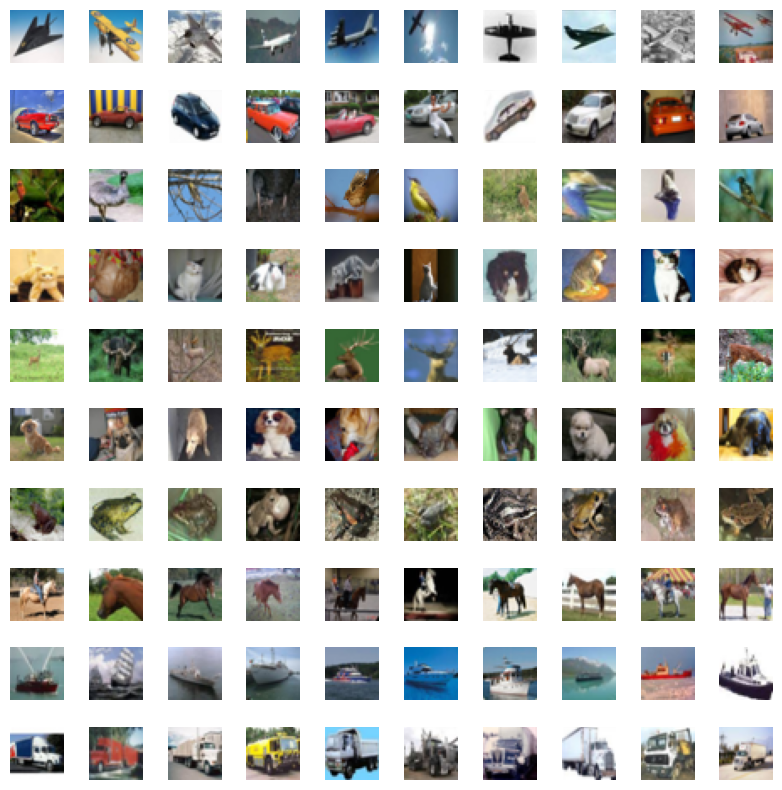

In [14]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(baseline_history.history['loss'], label='Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.title('Loss Curve')

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(baseline_history.history['accuracy'], label='Train Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

# Plot 10 random images per class
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for class_idx in range(10):
    indices = np.where(y_train.argmax(axis=1) == class_idx)[0]
    sample_indices = np.random.choice(indices, 10, replace=False)

    for j, img_idx in enumerate(sample_indices):
        ax = axes[class_idx, j]
        ax.imshow(x_train[img_idx])
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(class_names[class_idx], fontsize=10, rotation=90, labelpad=10)

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [15]:
from keras.backend import clear_session
clear_session()

In [16]:
# Your code here :
# Build the VGG-like model
vgg_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [17]:
# Your code here :
from tensorflow.keras.optimizers import SGD
# Compile the VGG-like model
vgg_model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the VGG-like model
vgg_history = vgg_model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.1468 - loss: 2.2704 - val_accuracy: 0.2427 - val_loss: 2.1417
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2654 - loss: 2.0925 - val_accuracy: 0.2609 - val_loss: 2.0396
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2957 - loss: 1.9928 - val_accuracy: 0.3260 - val_loss: 1.9118
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3293 - loss: 1.9062 - val_accuracy: 0.3512 - val_loss: 1.8568
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3470 - loss: 1.8603 - val_accuracy: 0.3732 - val_loss: 1.7915
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3727 - loss: 1.7891 - val_accuracy: 0.3764 - val_loss: 1.7673
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3838 - loss: 1.7588 - val_accuracy: 0.3955 - val_loss: 1.7311
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4015 - loss: 1.7178 - val_accuracy: 0.3986 - 

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


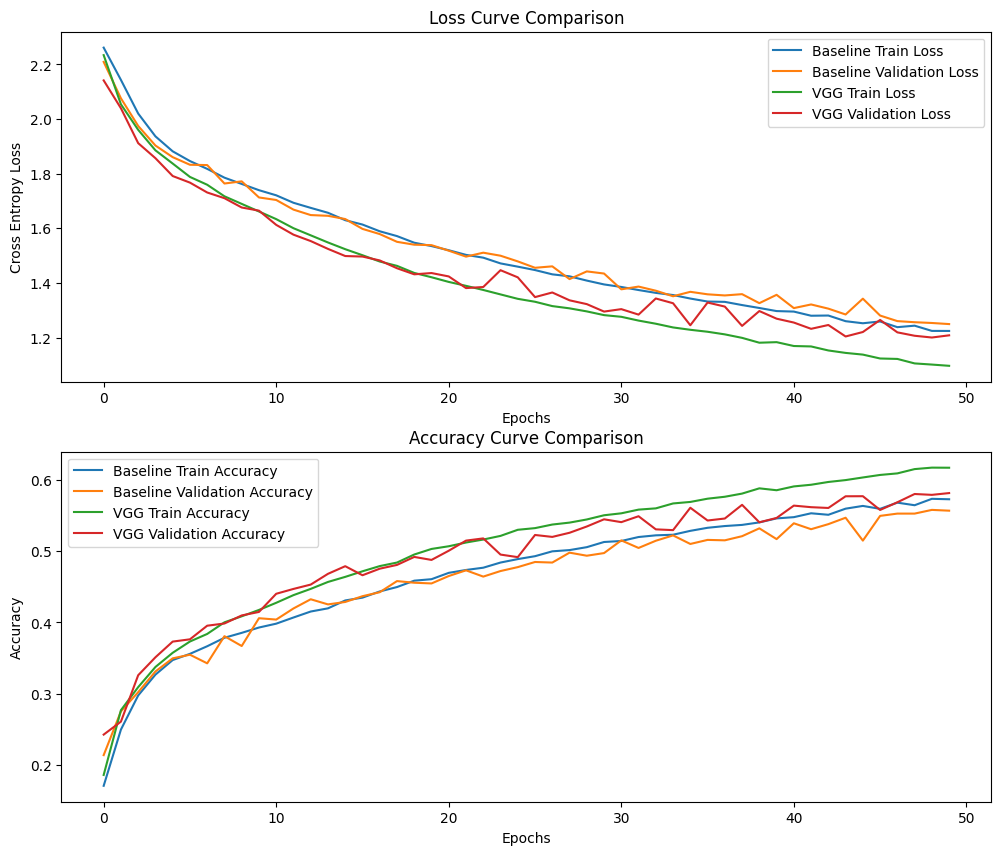

In [18]:
# Your code here :
# Plot loss and accuracy curves for both models
plt.figure(figsize=(12, 10))

# Loss curve
plt.subplot(2, 1, 1)
plt.plot(baseline_history.history['loss'], label='Baseline Train Loss')
plt.plot(baseline_history.history['val_loss'], label='Baseline Validation Loss')
plt.plot(vgg_history.history['loss'], label='VGG Train Loss')
plt.plot(vgg_history.history['val_loss'], label='VGG Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.title('Loss Curve Comparison')

# Accuracy curve
plt.subplot(2, 1, 2)
plt.plot(baseline_history.history['accuracy'], label='Baseline Train Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(vgg_history.history['accuracy'], label='VGG Train Accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve Comparison')

plt.show()


**Comment on the observation**

*(Double-click or enter to edit)*

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


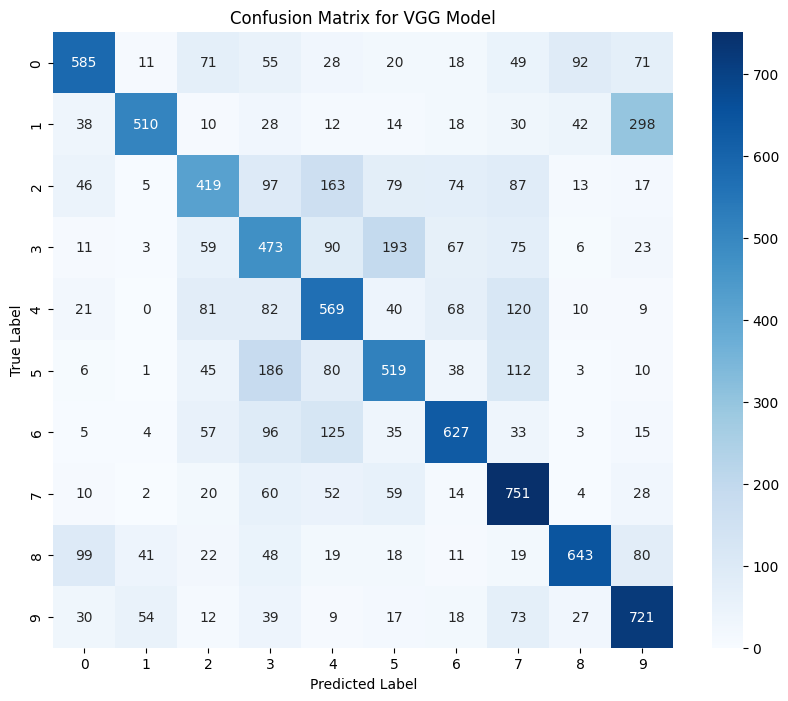

In [19]:
# Your code here :
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the output for the test split
y_pred = vgg_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for VGG Model')
plt.show()

**Comment here :**

*(Double-click or enter to edit)*

...

*    Print the test accuracy for the trained model.

In [20]:
# Your code here :
# Print test accuracy for the trained model
test_loss, test_accuracy = vgg_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy for VGG Model: {test_accuracy:.4f}")

Test Accuracy for VGG Model: 0.5817


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [25]:
from keras.backend import clear_session
clear_session()

In [26]:
# Your code here :
# Build the deeper VGG-like model
vgg_deep_model = Sequential()
# Add layers to the model (example of a deeper VGG-like structure)
vgg_deep_model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
vgg_deep_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
vgg_deep_model.add(MaxPooling2D(pool_size=(2, 2)))

vgg_deep_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg_deep_model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
vgg_deep_model.add(MaxPooling2D(pool_size=(2, 2)))

vgg_deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg_deep_model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
vgg_deep_model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the last convolutional layer
vgg_deep_model.add(Flatten())  # This will flatten the 4x4x256 output to a vector of length 4096
vgg_deep_model.add(Dense(512, activation='relu'))
vgg_deep_model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [27]:
# Your code here
# Compile the model
vgg_deep_model.compile(loss='categorical_crossentropy',
                       optimizer=SGD(),
                       metrics=['accuracy'])

# Train the model
vgg_deep_history = vgg_deep_model.fit(x_train, y_train,
                                      epochs=10,
                                      batch_size=512,
                                      validation_data=(x_test, y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.1115 - loss: 2.3014 - val_accuracy: 0.1941 - val_loss: 2.2973
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1672 - loss: 2.2960 - val_accuracy: 0.1719 - val_loss: 2.2899
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1601 - loss: 2.2872 - val_accuracy: 0.1716 - val_loss: 2.2716
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1797 - loss: 2.2608 - val_accuracy: 0.2249 - val_loss: 2.1973
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2307 - loss: 2.1627 - val_accuracy: 0.2682 - val_loss: 2.0455
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2484 - loss: 2.0736 - val_accuracy: 0.2782 - val_loss: 1.9821
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2784 - loss: 2.0085 - val_accuracy: 0.2709 - val_loss: 2.0628
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2963 - loss: 1.9643 - val_accuracy: 0.3303 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


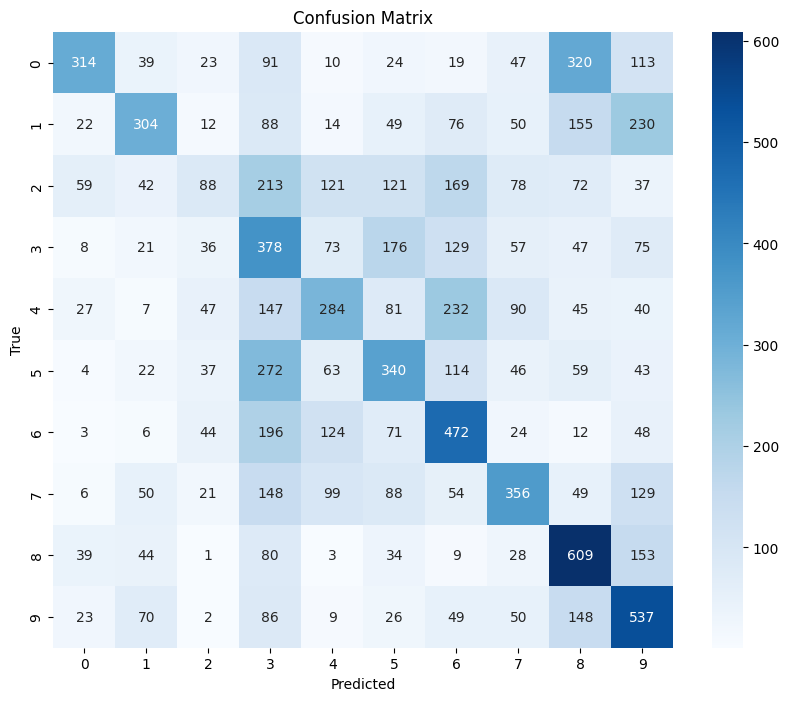

In [29]:

# Predict the output for the test data
y_pred = vgg_deep_model.predict(x_test)

# Convert predictions to class labels (highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoding to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_Activation functions are mathematical operations applied to the output of a neural network layer to introduce non-linearity into the model.

2 - Key Differences between sigmoid and softmax:



_Sigmoid:
Output: 0 to 1 (single class probability).
Use Case: Binary classification.
Softmax:
Output: Probabilities that sum to 1 across multiple classes.
Use Case: Multi-class classification.

3 - Key Differences between categorical crossentropy and binary crossentropy loss:


_Categorical Crossentropy:
Use Case: Multi-class classification (one-hot encoded labels).
Input: Model outputs class probabilities (Softmax).
Binary Crossentropy:
Use Case: Binary classification (0 or 1 labels).
Input: Model outputs a single probability (Sigmoid)
